In [43]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [44]:
df = pd.read_csv('spam.csv' ,encoding='latin-1')
#Our data is not encoded in UTF-8.

In [45]:
df.shape

(5572, 5)

In [46]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [47]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
#we drop the unnecessary columns.

In [48]:
df.columns = ['label', 'text']
#We renamed our columns.

In [49]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


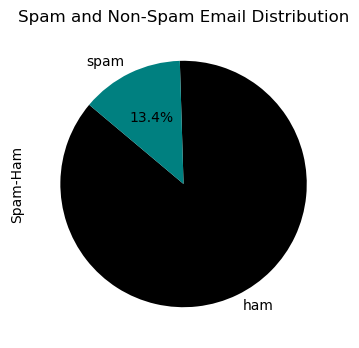

In [50]:
#Count the number of tags
label_counts = df['label'].value_counts()
color = ['black', 'teal'] 

# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=color)
plt.title('Spam and Non-Spam Email Distribution')
plt.ylabel('Spam-Ham')
plt.show()

In [51]:
X =  df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
#is to convert text data into a numerical matrix.
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [53]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [54]:
# We adapt and transform our training data
X_train_vectorized = vectorizer.fit_transform(X_train['text'])

# We adapt and transform our testing data
X_test_vectorized = vectorizer.transform(X_test['text'])

In [55]:
#We creat binary features for BernoulliNB
X_train_binary = X_train_vectorized.copy()
X_train_binary[X_train_binary > 0] = 1
X_test_binary = X_test_vectorized.copy()
X_test_binary[X_test_binary > 0] = 1

In [56]:
# Multinomial Naive Bayes
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_vectorized, y_train)
mnb_predictions = mnb_classifier.predict(X_test_vectorized)
print("Multinomial Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, mnb_predictions))
print("Classification Report:\n", classification_report(y_test, mnb_predictions))
print("-" * 50)

# Gaussian Naive Bayes
gnb_classifier = GaussianNB()
# We need to convert it to dense matrix.
gnb_classifier.fit(X_train_vectorized.toarray(), y_train)
gnb_predictions = gnb_classifier.predict(X_test_vectorized.toarray())
print("Gaussian Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:\n", classification_report(y_test, gnb_predictions))
print("-" * 50)

# Bernoulli Naive Bayes
bnb_classifier = BernoulliNB()
bnb_classifier.fit(X_train_binary, y_train)
bnb_predictions = bnb_classifier.predict(X_test_binary)
print("Bernoulli Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, bnb_predictions))
print("Classification Report:\n", classification_report(y_test, bnb_predictions))
print("-" * 50)

Multinomial Naive Bayes Results:
Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

--------------------------------------------------
Gaussian Naive Bayes Results:
Accuracy: 0.9004484304932735
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.90      0.94       965
        spam       0.58      0.92      0.71       150

    accuracy                           0.90      1115
   macro avg       0.78      0.91      0.83      1115
weighted avg       0.93      0.90      0.91      1115

--------------------------------------------------
Bernoulli Naive Bayes Results:
Accuracy: 0.9748878923766816
Classification 